In [7]:
import tensorflow as tf
import tensorflow.contrib.layers as tfl
from skimage.data import astronaut
from scipy.misc import imresize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


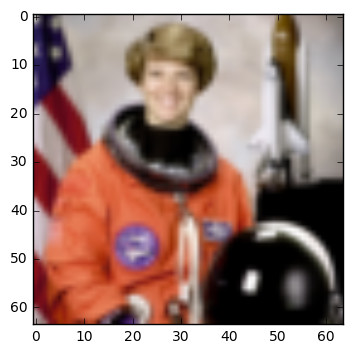

In [8]:
img = imresize(astronaut(), (64, 64))
imshow(img)

In [9]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

In [10]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [11]:
n_neurons = [2, 128, 128]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = tfl.linear(
        inputs=current_input,
        num_outputs=n_neurons[layer_i],
        activation_fn=tf.nn.relu, 
        scope='layer/' + str(layer_i))

means = tfl.linear(inputs=current_input,
                   num_outputs=3,
                   activation_fn=tf.nn.relu,
                   scope='means')
sigmas = tf.maximum(tfl.linear(inputs=current_input,
                    num_outputs=3,
                    activation_fn=tf.nn.relu,
                    scope='sigmas'), 1e-10)


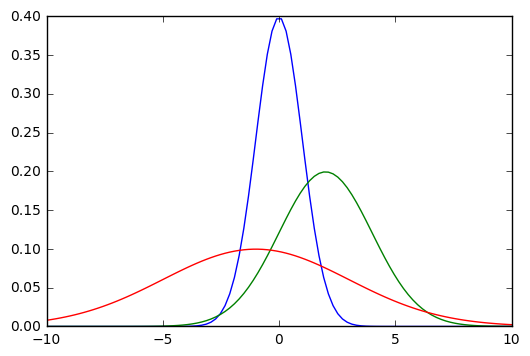

In [13]:
def gausspdf(x, mean=0, sigma=1):
    return np.exp(-(x - mean)**2 / (2 * sigma**2)) / (np.sqrt(2.0 * np.pi) * sigma)

xvals = np.linspace(-10, 10, 100)
plt.plot(xvals, gausspdf(xvals))
plt.plot(xvals, gausspdf(xvals, 2, 2.0))
plt.plot(xvals, gausspdf(xvals, -1, 4.0))


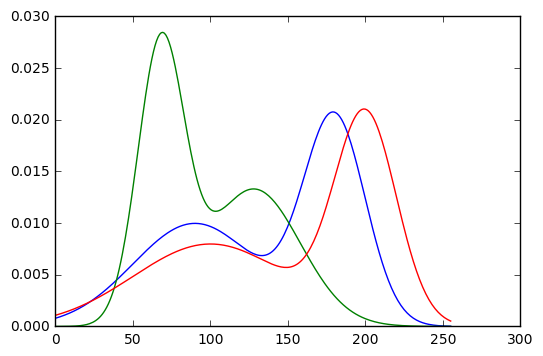

In [14]:
xvals = np.linspace(0, 255, 255)
plt.plot(
    np.repeat(xvals[:, np.newaxis], 3, axis=1),
    np.c_[gausspdf(xvals, 180, 20) +
            gausspdf(xvals, 90, 40),
          gausspdf(xvals, 128.0, 30.0) +
            gausspdf(xvals, 68.0, 15.0),
          gausspdf(xvals, 100, 50.0) +
            gausspdf(xvals, 200, 20.0)])


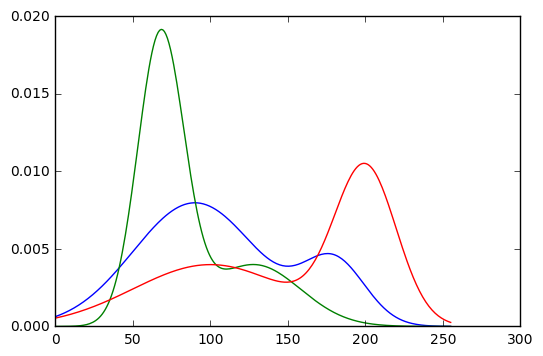

In [15]:
xvals = np.linspace(0, 255, 255)
plt.plot(
    np.repeat(xvals[:, np.newaxis], 3, axis=1),
    np.c_[0.2 * gausspdf(xvals, 180, 20) + 
            0.8 * gausspdf(xvals, 90, 40),
          0.3 * gausspdf(xvals, 128.0, 30.0) +
            0.7 * gausspdf(xvals, 68.0, 15.0),
          0.5 * gausspdf(xvals, 100, 50.0) +
            0.5 * gausspdf(xvals, 200, 20.0)])
